# Распознавание предметов одежды с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

## Библиотеки
Подключаем все необходимые библиотеки

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## 1) Загружаем набор данных 
Подготовка данных для обучения сети.

В Keras встроены средства работы с популярными наборами данных. В нашем примере загружаем набор данных fashion_mnist и делим этот набор на две части:

1. (x_train, y_train) - обучающая выборка;
2. (x_test, y_test) - тестовая выборка.

Загружаем набор данных

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов на русском языке

In [4]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

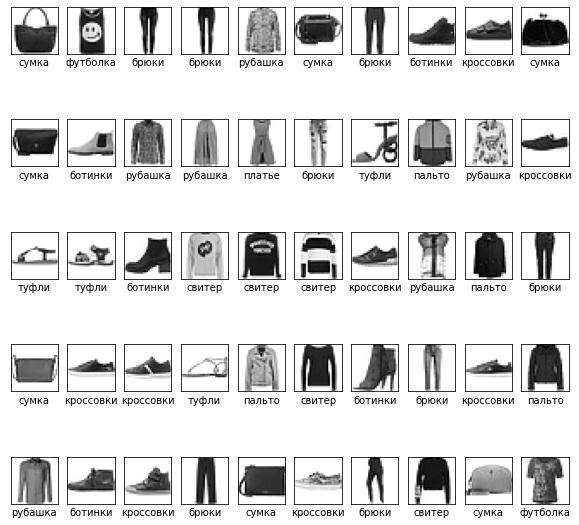

In [5]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## 2) Предварительная обработка данных

**Преобразование размерности данных в наборе**

Библиотека Pandas лучше всего работает с линейными данными. Поэтому преобразуем весь массив изображений в одномерный массив длины 60000*784.

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

Векторизованные операции применяются к каждому элементу массива отдельно.

In [7]:
x_train = x_train / 255 
x_test = x_test / 255

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [8]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [10]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 3) Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [214]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))

model.add(Dense(200, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству предметов одежды)
model.add(Dense(10, activation="softmax"))

## 4) Компиляция нейронной сети

В качестве функции потерь используем categorical_crossentropy;

В качестве оптимизатора используем adam;

В качестве метрики (насколько мы близки к верным ответам) точности используем процент правильных ответов.

In [215]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Выводим параметры нейронной сети
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 800)               628000    
                                                                 
 dense_34 (Dense)            (None, 200)               160200    
                                                                 
 dense_35 (Dense)            (None, 10)                2010      
                                                                 
Total params: 790,210
Trainable params: 790,210
Non-trainable params: 0
_________________________________________________________________
None


## 5) Обучение нейронной сети

In [216]:
history = model.fit(x_train, y_train, 
          batch_size=3200, 
          epochs=30,
          validation_split=0.2,  
          verbose=1)

Epoch 1/30
15/15 [==============================] - 1s 52ms/step - loss: 1.0299 - accuracy: 0.6690 - val_loss: 0.6021 - val_accuracy: 0.7912
Epoch 2/30
15/15 [==============================] - 1s 42ms/step - loss: 0.5360 - accuracy: 0.8149 - val_loss: 0.4892 - val_accuracy: 0.8347
Epoch 3/30
15/15 [==============================] - 1s 44ms/step - loss: 0.4600 - accuracy: 0.8395 - val_loss: 0.4456 - val_accuracy: 0.8443
Epoch 4/30
15/15 [==============================] - 1s 41ms/step - loss: 0.4184 - accuracy: 0.8528 - val_loss: 0.4182 - val_accuracy: 0.8534
Epoch 5/30
15/15 [==============================] - 1s 43ms/step - loss: 0.4024 - accuracy: 0.8585 - val_loss: 0.4103 - val_accuracy: 0.8557
Epoch 6/30
15/15 [==============================] - 1s 45ms/step - loss: 0.3850 - accuracy: 0.8650 - val_loss: 0.3980 - val_accuracy: 0.8582
Epoch 7/30
15/15 [==============================] - 1s 41ms/step - loss: 0.3585 - accuracy: 0.8749 - val_loss: 0.3681 - val_accuracy: 0.8710
Epoch 8/30
15

## Просмотрим историю обучения

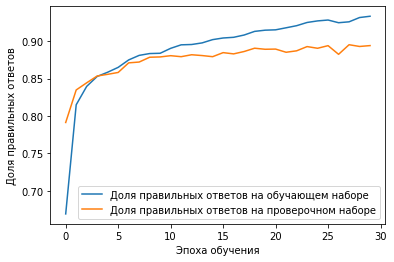

Доля правильных ответов на:
Обучающий набор: 0.9333333373069763
Проверочный набор: 0.8940833210945129
0.039


In [217]:
plt.plot(history.history['accuracy'],
    label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
    label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

print('Доля правильных ответов на:')
print('Обучающий набор: ' + str(history.history['accuracy'][-1]))
print('Проверочный набор: ' + str(history.history['val_accuracy'][-1]))
print('{0:.3f}'.format(history.history['accuracy'][-1]-history.history['val_accuracy'][-1]))

Сохраним нейронную суть для последующего использования

In [218]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

In [219]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8869


In [220]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 88.69


## 6) Использование нейронной сети для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [221]:
predictions = model.predict(x_test)

## Проверяем качество распознавания

Импортим *randint*, чтобы тыкать на кнопочку и смотреть разные картинки.

In [222]:
from random import randint

Выводим картинку, правильный ответ и то, что нам дала нейронка.

Номер тестового изображения: 1157
Данные в формате one-hot-encoding:
[1.5026729e-09 4.5155986e-09 5.0607909e-09 2.7973421e-08 7.1534720e-09
 2.4305423e-06 2.6992995e-09 9.9996626e-01 9.2677619e-06 2.2102742e-05]
Класс, который предложила сеть: кроссовки (7)
Правильный класс: кроссовки (7)
ПРАВИЛЬНО


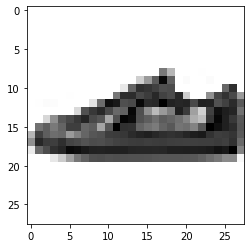

In [248]:
n = randint(0, x_test.shape[0])

print(f'Номер тестового изображения: {n}')
print('Данные в формате one-hot-encoding:')
print(predictions[n])

predicted = np.argmax(predictions[n])
print(f'Класс, который предложила сеть: {classes[predicted]} ({predicted})')

right = np.argmax(y_test[n])
print(f'Правильный класс: {classes[right]} ({right})')

print(f'{"ПРАВИЛЬНО" if predicted == right else "!!!!! НЕПРАВИЛЬНО !!!!!"}')

plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()